## **Visualizing And Analyszing The Data**

**Importing The Libraries**

In [1]:
%pip install notebook ipykernel


In [2]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [ ]:

%pip install pandas
%pip install numpy
%pip install seaborn
%pip install scikit-learn
%pip install pickle-mixin
%pip install Flask
%pip install matplotlib
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import classification_report,confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.




**Read The Dataset**

In [4]:
csv_path = "./application_record.csv"  # update with actual file name
app = pd.read_csv(csv_path)
app.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
csv_path2="./credit_record.csv"
credit=pd.read_csv(csv_path2)
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


**Univariate Analysis**

Number of people working status:
OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_16608\356461762.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OCCUPATION_TYPE', data=app, palette='Set2')


<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

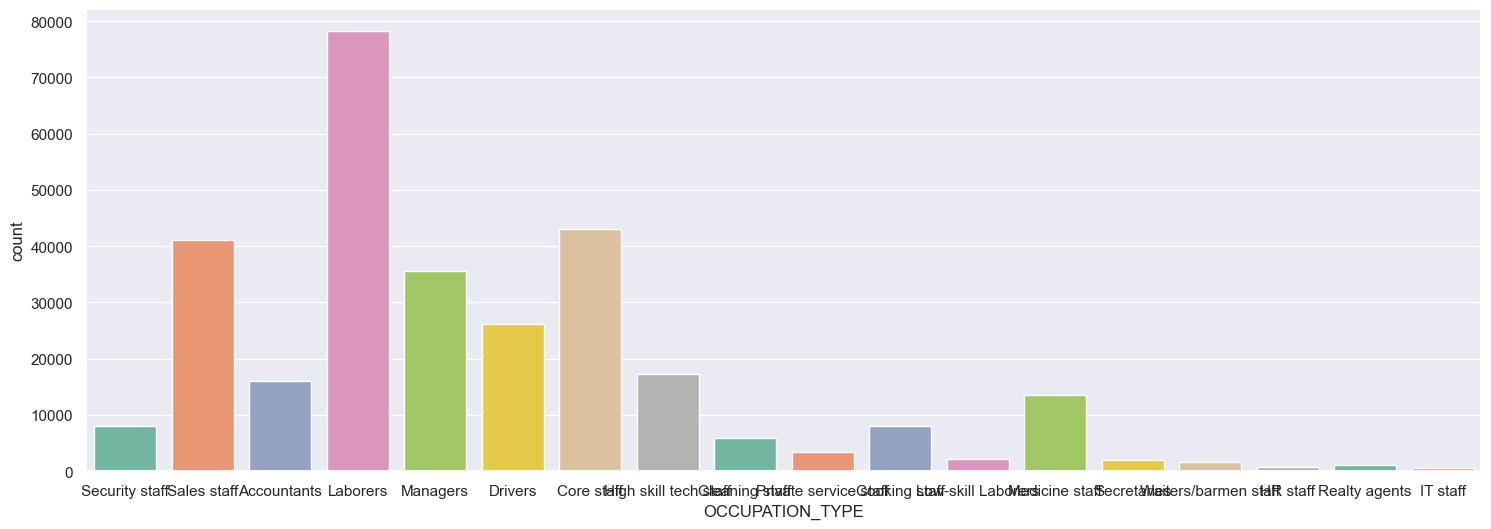

In [6]:
print("Number of people working status:")

print(app['OCCUPATION_TYPE'].value_counts())

sns.set(rc={'figure.figsize': (18,6)})

sns.countplot(x='OCCUPATION_TYPE', data=app, palette='Set2')

Types of house of the peoples:
NAME_HOUSING_TYPE
House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_16608\1034458762.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_HOUSING_TYPE', data=app, palette='Set2')


<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

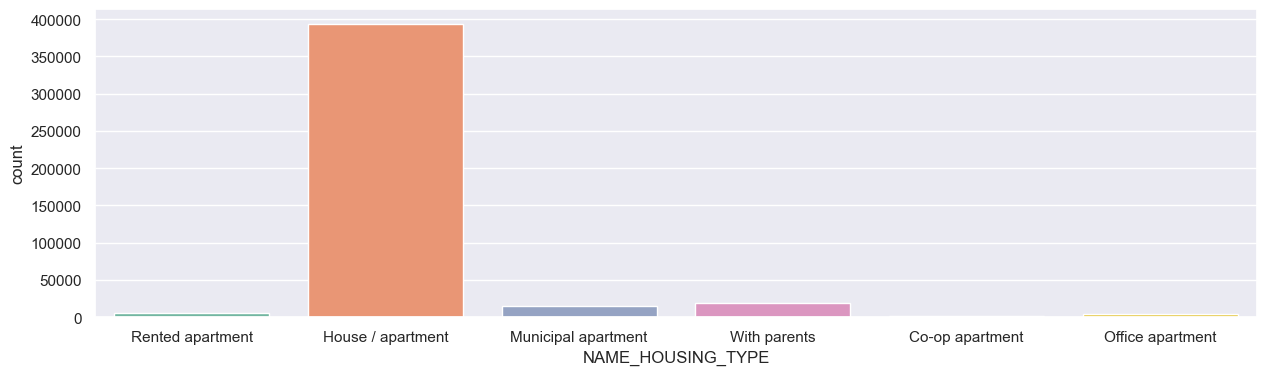

In [7]:
print("Types of house of the peoples:")

print(app['NAME_HOUSING_TYPE'].value_counts())

sns.set(rc = {'figure.figsize': (15,4)})

sns.countplot(x='NAME_HOUSING_TYPE', data=app, palette='Set2')

Income Types Of the Person :
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_16608\3442218026.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_INCOME_TYPE', data=app, palette = 'Set2')


<Axes: xlabel='NAME_INCOME_TYPE', ylabel='count'>

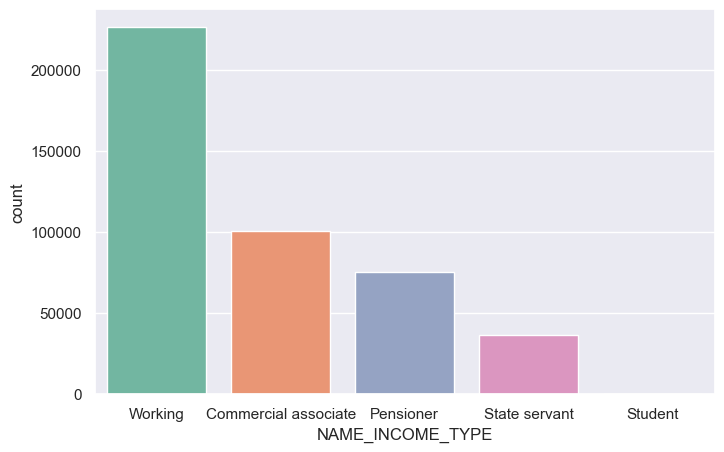

In [8]:
print("Income Types Of the Person :")

print(app['NAME_INCOME_TYPE'].value_counts())

sns.set(rc= {'figure.figsize':(8,5)})

sns.countplot(x='NAME_INCOME_TYPE', data=app, palette = 'Set2')

**Multivariate Analysis**

<Axes: >

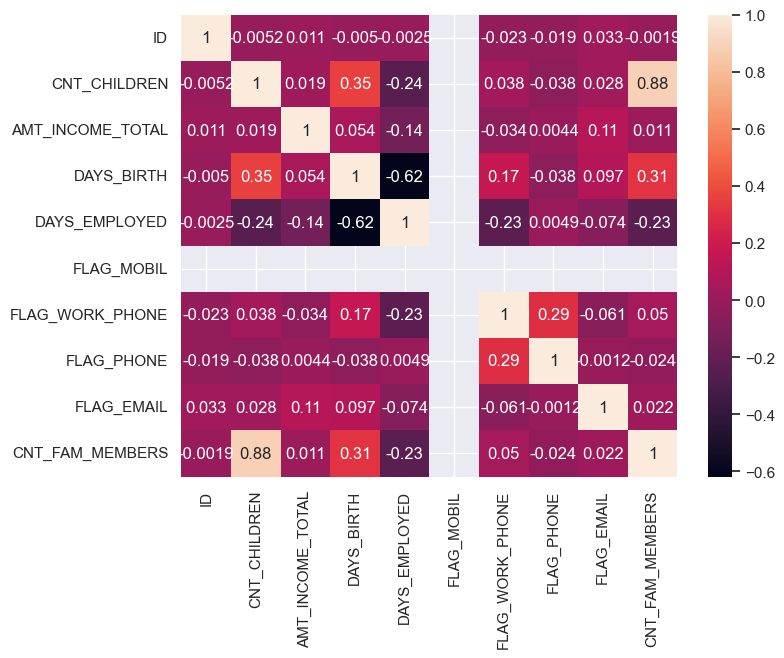

In [9]:
# Select only numerical columns before calculating the correlation
numerical_app = app.select_dtypes(include=np.number)

fig, ax = plt.subplots(figsize=(8,6))

# Calculate and plot the correlation matrix for numerical columns
sns.heatmap(numerical_app.corr(), annot=True)

**Descriptive Analysis**

In [10]:
app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


## **Data Pre-Processing**

In [11]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [12]:
def unique_values():

  a=app.CODE_GENDER.unique()

  print("----------------CODE GENDER-------------------")

  print(a)

  print()

  b=app.FLAG_OWN_CAR.unique()

  print("------------------FLAG OWN CAR----------------")

  print(b)

  print()

  c=app.FLAG_OWN_REALTY.unique()

  print("----------------FLAG OWN REALTY----------------")

  print(c)

  print()

  d=app.CNT_CHILDREN.unique()

  print("---------------- CNT_CHILDREN------------------")

  print(d)

  print()

  e=app.NAME_INCOME_TYPE.unique()

  print("----------------NAME INCOME TYPE----------------")

  print(e)

  print()

  f=app.NAME_EDUCATION_TYPE.unique()

  print("----------------NAME EDUCATION TYPE--------------")

  print(f)

  print()
  g=app.NAME_FAMILY_STATUS.unique()

  print("----------------NAME FAMILY STATUS----------------")

  print(g)

  print()

  h=app.NAME_HOUSING_TYPE.unique()

  print("----------------NAME HOUSING TYPE----------------")

  print(h)

  print()

  i=app.OCCUPATION_TYPE.unique()

  print("----------------OCCUPATION TYPE------------------")

  print(i)

  print()

  j=app.CNT_FAM_MEMBERS.unique()

  print("----------------CNT FAM MEMBERS------------------")

  print(j)

  print()

  return unique_values

**Dropping Unwanted Features**

In [ ]:
app.drop_duplicates (subset=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'], keep='first', inplace=True)

**Handling Missing Values**

In [14]:
app.isnull().mean()

ID                     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.000000
FLAG_MOBIL             0.000000
FLAG_WORK_PHONE        0.000000
FLAG_PHONE             0.000000
FLAG_EMAIL             0.000000
OCCUPATION_TYPE        0.305012
CNT_FAM_MEMBERS        0.000000
dtype: float64

**Data Cleaning And Merging**

In [15]:
def data_cleansing(data):
    # Adding number of family members with number of children to get overall family members.
    #data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'] + data['CNT_CHILDREN']

    dropped_cols = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
                    'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_CHILDREN']
    data = data.drop(dropped_cols, axis = 1)

    #converting birth years and days employed to years.
    data['DAYS_BIRTH'] = np.abs(data['DAYS_BIRTH'])/365 #Absolute
    data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED']/365

    #Cleaning up categorical values to lower the count of dummy variables.
    housing_type = {'House / apartment' : 'House / apartment',
                    'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment' : 'House / apartment',
                    'Office apartment' : 'House / apartment',
                    'Co-op apartment' : 'House / apartment'}

    income_type = {'Commercial associate':'Working',
                   'State servant':'Working',
                   'Working':'Working',
                   'Pensioner':'Pensioner',
                   'Student':'Student'}

    education_type = {'Secondary / secondary special':'secondary',
                      'Lower secondary':'secondary',
                      'Higher education':'Higher education',
                      'Incomplete higher':'Higher education',
                      'Academic degree':'Academic degree'}

    family_status = {'Single / not married':'Single',
                     'Separated':'Single',
                     'Widow':'Single',
                     'Civil marriage':'Married',
                     'Married':'Married'}

    data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(housing_type)
    data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].map(income_type)
    data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].map(education_type)
    data['NAME_FAMILY_STATUS']=data['NAME_FAMILY_STATUS'].map(family_status)

    return data
data = data_cleansing(app)
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,427500.0,Working,Higher education,Married,House / apartment,32.890411,-12.443836,2.0
2,5008806,M,Y,Y,112500.0,Working,secondary,Married,House / apartment,58.832877,-3.106849,2.0
3,5008808,F,N,Y,270000.0,Working,secondary,Single,House / apartment,52.356164,-8.358904,1.0
7,5008812,F,N,Y,283500.0,Pensioner,Higher education,Single,House / apartment,61.545205,1000.665753,1.0
10,5008815,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,46.224658,-2.106849,2.0


In [16]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [17]:
# Data frame to analyze length of time since initial approval of credit card
# Shows number of past dues, paid off and no loan status.
grouped = credit.groupby('ID')

pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']
pivot_tb['window'] += 1 # Adding 1 since month starts at 0.

#Counting number of past dues, paid offs and no loans.
pivot_tb['paid_off'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'C'].count(axis = 1)
pivot_tb['pastdue_1-29'] = pivot_tb[pivot_tb.iloc[:,0:61] == '0'].count(axis = 1)
pivot_tb['pastdue_30-59'] = pivot_tb[pivot_tb.iloc[:,0:61] == '1'].count(axis = 1)
pivot_tb['pastdue_60-89'] = pivot_tb[pivot_tb.iloc[:,0:61] == '2'].count(axis = 1)
pivot_tb['pastdue_90-119'] = pivot_tb[pivot_tb.iloc[:,0:61] == '3'].count(axis = 1)
pivot_tb['pastdue_120-149'] = pivot_tb[pivot_tb.iloc[:,0:61] == '4'].count(axis = 1)
pivot_tb['pastdue_over_150'] = pivot_tb[pivot_tb.iloc[:,0:61] == '5'].count(axis = 1)
pivot_tb['no_loan'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'X'].count(axis = 1)

#Setting Id column to merge with app data.
pivot_tb['ID'] = pivot_tb.index


In [18]:
pivot_tb.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,window,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan,ID
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,0,3,0,0,0,0,0,1,5001711
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19,9,10,0,0,0,0,0,0,5001712
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,0,0,0,0,0,0,0,22,5001713
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,0,0,0,0,0,0,0,15,5001714
5001715,NaN,X,X,X,X,X,X,X,X,X,...,60,0,0,0,0,0,0,0,60,5001715


**Feature Engineering**

In [19]:
def feature_engineering_target(data):
    good_or_bad = []

    for index, row in data.iterrows():
        paid_off = row['paid_off']
        over_1 = row['pastdue_1-29']
        over_30 = row['pastdue_30-59']
        over_60 = row['pastdue_60-89']
        over_90 = row['pastdue_90-119']
        over_120 = row['pastdue_120-149'] + row['pastdue_over_150']
        no_loan = row['no_loan']

        overall_pastdues = over_1 + over_30 + over_60 + over_90 + over_120

        if overall_pastdues == 0:
            if paid_off >= no_loan or paid_off <= no_loan:
                good_or_bad.append(1)
            elif paid_off == 0 and no_loan == 1:
                good_or_bad.append(1)

        elif overall_pastdues != 0:
            if paid_off > overall_pastdues:
                good_or_bad.append(1)
            elif paid_off <= overall_pastdues:
                good_or_bad.append(0)

        elif paid_off == 0 and no_loan != 0:
            if overall_pastdues <= no_loan or overall_pastdues >= no_loan:
                good_or_bad.append(0)
        else:
            good_or_bad.append(1)

    return good_or_bad


In [20]:
target = pd.DataFrame()
target['ID'] = pivot_tb.index
target['paid_off'] = pivot_tb['paid_off'].values
target['#_of_pastdues'] = pivot_tb['pastdue_1-29'].values + pivot_tb['pastdue_30-59'].values \
+ pivot_tb['pastdue_60-89'].values + pivot_tb['pastdue_90-119'].values \
+ pivot_tb['pastdue_120-149'].values + pivot_tb['pastdue_over_150'].values

target['no_loan'] = pivot_tb['no_loan'].values
target['target'] = feature_engineering_target(pivot_tb)
credit_app = data_cleansing(app).merge(target, how = 'inner', on = 'ID')
credit_app.drop('ID', axis = 1, inplace = True)

credit_app


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,#_of_pastdues,no_loan,target
0,M,Y,Y,427500.0,Working,Higher education,Married,House / apartment,32.890411,-12.443836,2.0,13,2,1,1
1,M,Y,Y,112500.0,Working,secondary,Married,House / apartment,58.832877,-3.106849,2.0,7,7,16,0
2,F,N,Y,270000.0,Working,secondary,Single,House / apartment,52.356164,-8.358904,1.0,0,2,3,0
3,F,N,Y,283500.0,Pensioner,Higher education,Single,House / apartment,61.545205,1000.665753,1.0,0,14,3,0
4,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,46.224658,-2.106849,2.0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,F,N,N,180000.0,Pensioner,secondary,Married,House / apartment,56.438356,-0.542466,2.0,0,21,0,0
9705,F,N,Y,112500.0,Working,secondary,Married,House / apartment,43.389041,-7.380822,2.0,8,12,0,0
9706,M,Y,Y,90000.0,Working,secondary,Married,House / apartment,52.331507,-4.715068,2.0,0,17,5,0
9707,F,N,Y,157500.0,Pensioner,Higher education,Married,House / apartment,33.936986,-3.630137,2.0,14,19,0,0


In [21]:
from sklearn.preprocessing import LabelEncoder

cg = LabelEncoder()
oc = LabelEncoder()
own_r = LabelEncoder()
it = LabelEncoder()
et = LabelEncoder()
fs = LabelEncoder()
ht = LabelEncoder()

credit_app['CODE_GENDER'] = cg.fit_transform(credit_app['CODE_GENDER'])
credit_app['FLAG_OWN_CAR'] = oc.fit_transform(credit_app['FLAG_OWN_CAR'])
credit_app['FLAG_OWN_REALTY'] = own_r.fit_transform(credit_app['FLAG_OWN_REALTY'])
credit_app['NAME_INCOME_TYPE'] = it.fit_transform(credit_app['NAME_INCOME_TYPE'])
credit_app['NAME_EDUCATION_TYPE'] = et.fit_transform(credit_app['NAME_EDUCATION_TYPE'])
credit_app['NAME_FAMILY_STATUS'] = fs.fit_transform(credit_app['NAME_FAMILY_STATUS'])
credit_app['NAME_HOUSING_TYPE'] = ht.fit_transform(credit_app['NAME_HOUSING_TYPE'])


credit_app


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,#_of_pastdues,no_loan,target
0,1,1,1,427500.0,2,1,0,0,32.890411,-12.443836,2.0,13,2,1,1
1,1,1,1,112500.0,2,2,0,0,58.832877,-3.106849,2.0,7,7,16,0
2,0,0,1,270000.0,2,2,1,0,52.356164,-8.358904,1.0,0,2,3,0
3,0,0,1,283500.0,0,1,1,0,61.545205,1000.665753,1.0,0,14,3,0
4,1,1,1,270000.0,2,1,0,0,46.224658,-2.106849,2.0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,180000.0,0,2,0,0,56.438356,-0.542466,2.0,0,21,0,0
9705,0,0,1,112500.0,2,2,0,0,43.389041,-7.380822,2.0,8,12,0,0
9706,1,1,1,90000.0,2,2,0,0,52.331507,-4.715068,2.0,0,17,5,0
9707,0,0,1,157500.0,0,1,0,0,33.936986,-3.630137,2.0,14,19,0,0


**Splitting Data Into Train and Test Set**

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(credit_app.drop('target',axis=1),credit_app['target'],test_size=0.2,random_state=0)

## **Model Building**

**Logistic Regression Model**

In [23]:
def logistic_reg(xtrain, xtest, ytrain, ytest):
    lr = LogisticRegression(solver='liblinear')
    lr.fit(xtrain, ytrain)
    ypred = lr.predict(xtest)
    print("LogisticRegression")
    print('Confusion matrix')
    print(confusion_matrix(ytest, ypred))
    print('Classification report')
    print(classification_report(ytest, ypred))
    return lr


**Random Forest Classifier**

In [24]:
def random_forest(xtrain, xtest, ytrain, ytest):
    rf = RandomForestClassifier()
    rf.fit(xtrain, ytrain)
    ypred = rf.predict(xtest)
    print("RandomForestClassifier")
    print('Confusion matrix')
    print(confusion_matrix(ytest, ypred))
    print('Classification report')
    print(classification_report(ytest, ypred))

**XG Boost Model**

In [25]:
def g_boosting(xtrain, xtest, ytrain, ytest):
    gb = GradientBoostingClassifier()
    gb.fit(xtrain, ytrain)
    ypred = gb.predict(xtest)
    print("GradientBoostingClassifier")
    print('Confusion matrix')
    print(confusion_matrix(ytest, ypred))
    print('Classification report')
    print(classification_report(ytest, ypred))

**Decision Tree Model**

In [26]:
def d_tree(xtrain, xtest, ytrain, ytest):
    dt = DecisionTreeClassifier()
    dt.fit(xtrain, ytrain)
    ypred = dt.predict(xtest)
    print("DecisionTreeClassifier")
    print('Confusion matrix')
    print(confusion_matrix(ytest, ypred))
    print('Classification report')
    print(classification_report(ytest, ypred))

**Comparision Of Models**

In [27]:
def compare_model(xtrain,xtest,ytrain,ytest):
    logistic_reg(xtrain, xtest, ytrain, ytest)
    print('-'*100)
    random_forest(xtrain, xtest, ytrain, ytest)
    print('-'*100)
    g_boosting(xtrain, xtest, ytrain, ytest)
    print('-'*100)
    d_tree(xtrain, xtest, ytrain, ytest)
compare_model(xtrain,xtest,ytrain,ytest)

LogisticRegression
Confusion matrix
[[1025   12]
 [   5  900]]
Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1037
           1       0.99      0.99      0.99       905

    accuracy                           0.99      1942
   macro avg       0.99      0.99      0.99      1942
weighted avg       0.99      0.99      0.99      1942

----------------------------------------------------------------------------------------------------
RandomForestClassifier
Confusion matrix
[[1022   15]
 [   8  897]]
Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1037
           1       0.98      0.99      0.99       905

    accuracy                           0.99      1942
   macro avg       0.99      0.99      0.99      1942
weighted avg       0.99      0.99      0.99      1942

-----------------------------------------------------------------------

**Saving The Model**

In [29]:

import pickle
import os
from sklearn.tree import DecisionTreeClassifier

# Train your model
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

# Create model/ directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the model
with open('model/c_card_approval_pred.pickle', 'wb') as f:
    pickle.dump(dt, f)
